## Introduction
In this kernal a regular season analysis will be conducted on NCAA tournament for seasons 2012 - 2019. A series of questions will be asked of the data, with the aim of better understanding the dataset provided. The results and answers to these questions will be displayed using packages provided by python. The questions will be :

1. a. Does a winning team score more points when playing at home, than when playing at either a neutral ground or an away ground?

1. b. Does a losing team score more points when playing at home, than when playing at either a neutral ground or an away ground?

2. Is there a difference in the amount of matches played at home, away or a neutral location?

3. a.  What is the average points scored in a day per season?

3. b. How does the average points scored in a day change from season to season?

4. What is the average variation in points scored for the winning team per season?

5. What is the average variation in points scored by the winning team when playing at home, away or a neutral location per season?

6. What is the average turnover by the winning team when playing at home, away or a neutral location per season?

7. What is the ranking of the top 15 teams based on the winning percentage per season?

8. Ranking the top 15 teams by the no. of points scored for all seasons irrespective of the number of matches played

In [38]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#Packages imported to be used for analysis

import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

import matplotlib.pyplot as plt
from collections import Counter

from IPython import display
from ipywidgets import interact, widgets



## Question 1a

Does a winning team score more points when playing at home than when playing at either a neutral ground or an away ground?

In [41]:
capstone= pd.read_csv("mens-machine-learning-competition-2019/Prelim2019_RegularSeasonDetailedResults.csv")
cap = pd.read_csv("mens-machine-learning-competition-2019/TeamSpellings.csv",encoding ="latin")
#cap2 = pd.read_csv("mens-machine-learning-competition-2019/TeamSp.csv",encoding ="latin")

capstone.head()


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


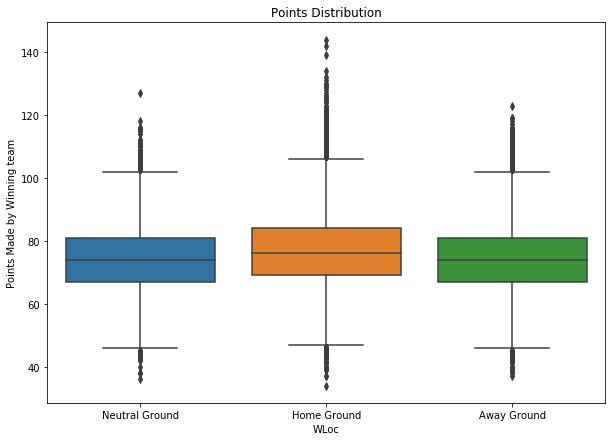

In [42]:
fig,ax1 = plt.subplots(1,1)
fig.set_size_inches(10,7)

capstone_plot= sns.boxplot(data = capstone, x= 'WLoc',y ='WScore')

ax1.set_title("Points Distribution")
ax1.set_xticklabels(['Neutral Ground',"Home Ground","Away Ground" ])
ax1.set_ylabel('Points Made by Winning team')
plt.show()

## Conclusion
The average number of points for the winning team at the home ground is higher than the points scored when playing at either away or neutral grounds.

## Question 1b
Does a losing team score more points when playing at home than when playing at either a neutral ground or an away ground?

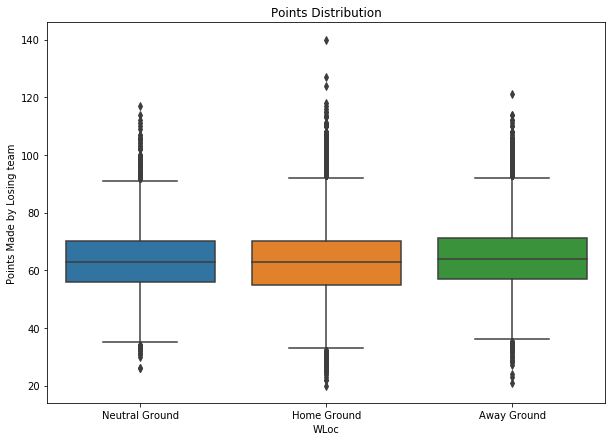

In [43]:
capstone= pd.read_csv("mens-machine-learning-competition-2019/Prelim2019_RegularSeasonDetailedResults.csv")
cap = pd.read_csv("mens-machine-learning-competition-2019/TeamSpellings.csv",encoding ="latin")
fig,ax1 = plt.subplots(1,1)
fig.set_size_inches(10,7)

capstone_plot= sns.boxplot(data = capstone, x= 'WLoc',y ='LScore')

ax1.set_title("Points Distribution")
ax1.set_xticklabels(['Neutral Ground',"Home Ground","Away Ground" ])
ax1.set_ylabel('Points Made by Losing team')
plt.show()

There seems to be no difference to the average number of points scored by the losing team when playing in either of the neutral, home or away locations.

## Question 2
What is the difference in amount of games played in either home, away or at a neutral location?

In [44]:
pd.DataFrame(capstone.WLoc.value_counts())

,WLoc
H,51821
A,26757
N,8788


In [45]:
groupHome= capstone.groupby("Season").WLoc.value_counts()

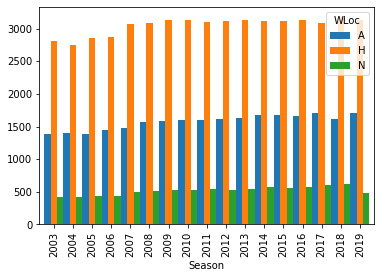

In [46]:
groupHome.unstack().plot(kind='bar',width =1.0)


## Conclusion
The proportion of all games played at home, away and in a neutral ground were all similar across all seasons.The graphs also show that more matches were played at home than at away and neutral locations in a given season.

## Question 3a
What is the average points scored in a day per season?

In [47]:
# The first thing to do is to associate TeamID to the name of the team. 
#This will help us put a name to the team
dic = {}
for i in range(0,len(cap["TeamID"])):
    dic[cap["TeamID"][i]]=cap['TeamNameSpelling'][i]
capstone["WTeamName"]=[dic[teamid] for teamid in capstone['WTeamID']]
capstone["LTeamName"]=[dic[teamid] for teamid in capstone['LTeamID']]

In [48]:
def plotyear(Season):
    Avg=pd.DataFrame(capstone[capstone.Season == Season].groupby("DayNum").WScore.mean().reset_index())
    plt.plot(Avg['DayNum'],Avg['WScore'])
    plt.axis(ymin=50,ymax=100,xmin=0,xmax=150)
    plt.xlabel('Progression of Season')
    plt.ylabel('Points Scored')
    plt.title(" Average Points Scored per Season ")
    plt.show()
    

In [49]:
Avg=pd.DataFrame(capstone[capstone.Season == 2003].groupby("DayNum").WScore.mean().reset_index())

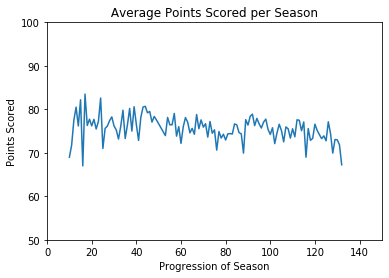

In [50]:
# First try the average point scored for 2003
plotyear(2003)

## Conclusion
The chart shows a general trend of decreasing points scored as the season progreesses.

## Question 3b
How does the average points scored in a day change from season to season?

In [55]:
#from IPython.display import display

%matplotlib inline 
#interactive.update(plotyear,Season=widgets.IntSlider(min=2003,max=2019,step=1,value=2003))
#interact(plotyear,Season=widgets.IntSlider(min=2003,max=2019,step=1,value=2003))

In [57]:
from IPython.display import display

%matplotlib inline
w=interactive(plotyear,Season=widgets.IntSlider(min=2003,max=2019,step=1,value=2003))


In [58]:
display(w)

interactive(children=(IntSlider(value=2003, description='Season', max=2019, min=2003), Output()), _dom_classes…

## Conclusion
It is difficult to see a pattern as season progreses when we compare season to season

## Question 4.
What is the average variation in points scored for the winning team per season? 

In [15]:
Home = capstone[capstone.WLoc == 'H']
Away = capstone[capstone.WLoc == 'A']
Neutral = capstone[capstone.WLoc == 'N']

In [16]:
AvgH=Home.groupby("Season").WScore.mean()

AvgA=Away.groupby("Season").WScore.mean()

AvgN=Neutral.groupby("Season").WScore.mean()

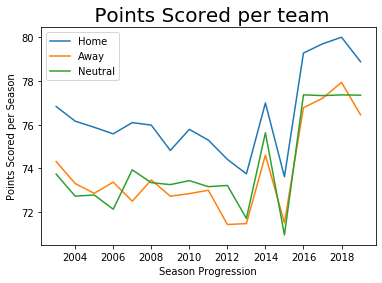

In [17]:
A=plt.plot(AvgH.index,AvgH)
B=plt.plot(AvgA.index,AvgA)
C=plt.plot(AvgN.index,AvgN)


plt.xlabel('Season Progression')
plt.ylabel('Points Scored per Season')
plt.title(' Points Scored per team', size=20)
plt.legend(["Home", "Away","Neutral"],loc=0)
plt.show()

## Conclusion
For all seasons the number of points scored by the winning team while playing at home is greater than points scored when playing at an away or a neutral location.

## Question 5.
What is the average variation in points scored by the winning team when playing at home, away or a neutral location per season?


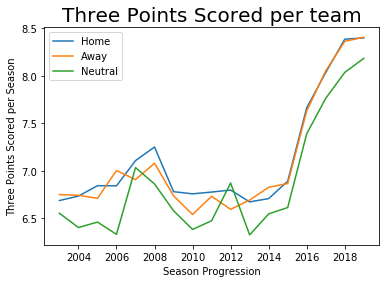

In [18]:


AvgH3=Home.groupby("Season").WFGM3.mean()

AvgA3=Away.groupby("Season").WFGM3.mean()

AvgN3=Neutral.groupby("Season").WFGM3.mean()

A=plt.plot(AvgH3.index,AvgH3)
B=plt.plot(AvgA3.index,AvgA3)
C=plt.plot(AvgN3.index,AvgN3)

plt.xlabel('Season Progression')
plt.ylabel('Three Points Scored per Season')
plt.title('Three Points Scored per team', size=20)
plt.legend(["Home", "Away","Neutral"],loc=0)
plt.show()

## Conclusion
For most seasons the number of three-pointers scored by the winning team while playing at home is greater than three pointers scored when playing at an away, or a neutral location.

## Question 6
What is the average variation in turnovers per season?

In [19]:
AvgHTO=Home.groupby("Season").WTO.mean()

AvgATO=Away.groupby("Season").WTO.mean()

AvgNTO=Neutral.groupby("Season").WTO.mean()

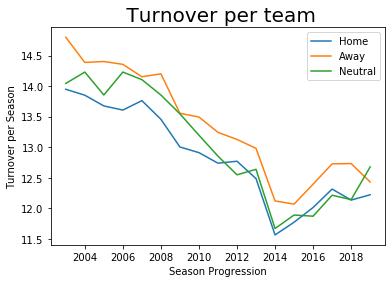

In [20]:
ATO=plt.plot(AvgHTO.index,AvgHTO)
BTO=plt.plot(AvgATO.index,AvgATO)
CTO=plt.plot(AvgNTO.index,AvgNTO)


plt.xlabel('Season Progression')
plt.ylabel('Turnover per Season')
plt.title(' Turnover per team', size=20)
plt.legend(["Home", "Away","Neutral"],loc=0)
plt.show()

## Conclusion
For all seasons the number of turnovers conceeded while playing at an away location for the winning team is greater than turnovers conceeded when playing at an home or a neutral location.

## Question 7
What is the ranking of the top 15 teams based on the winning percentage per season?
Winning Percentage is defined as (matches won/total matches played *100)

In [21]:
pc_dict={team:w.loc[team]/(l.loc[team]+w.loc[team]) * 100 for team in w.index}

NameError: name 'w' is not defined

In [ ]:
pc_dict_counter =Counter(pc_dict)
team=[]
percentage=[]
for item in pc_dict_counter.most_common(15):
    team.append(item[0])
    percentage.append(item[1])

team.reverse()
percentage.reverse()
plt.barh(team,percentage)
plt.title("Top 15 teams ranked by Win Percentage")
plt.ylabel("Team")
plt.xlabel("Percentages")
plt.tight_layout()
plt.show()

The team with the highest win percentage is Gonzaga

## Question 8
Ranking the top 15 teams by the no. of points scored in all seasons irrespective of the number of matches played

In [ ]:
Teams =capstone["WTeamName"].unique()
for year in range(2003,2019):
    points_dict  = {team:0 for team in Teams}
    results = capstone[capstone["Season"]==year]
    results.reset_index()
    for i in range(0,len(results)):
        points_dict[capstone['WTeamName'][i]] += capstone["WScore"][i]
        points_dict[capstone['LTeamName'][i]] += capstone["LScore"][i]


In [ ]:
Rank = {A:N for (A,N) in [x for x in g.items()][:15]}

labels = []
numbers = []

total = 0
for key, value in Rank.items():
    a=labels.append(key)
    b=numbers.append(value)
    total += value
index = np.arange(len(labels))


plt.figure(figsize=(10,5))

plt.barh(index,numbers)
for i, v in enumerate(numbers):
    plt.text(v + 0.2, i , str(v), color='black', fontweight='bold')
plt.yticks(index, labels, fontsize=10, rotation=0)

plt.title("Teams with highest number of points scored per season")
plt.tight_layout()
plt.show()

## Conclusion
Gonzaga scored the most amount of points per season.
